# linear regreesion（线性回归）

* 选用kernel learning_dl
~~~
conda create -n learning_dl python=3.6
conda activate learning_dl 
pip install tensorflow
pip install pandas
pip install seaborn

# conda remove --name learning_dl --all
~~~

In [66]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

print("finish import module!!!")

finish import module!!!


In [67]:
#读入数据并输出查看
data  = pd.read_csv('ex1data1.txt', names=['population', 'profit'])#读取数据并赋予列名
# data.head()#看数据前五行
print(data )

    population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


/home/gwp/miniconda3/envs/learning_dl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/gwp/miniconda3/envs/learning_dl/lib/python3.6/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


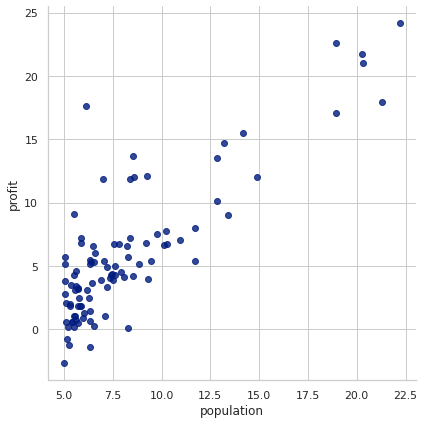

In [68]:
data.info()#查看数据的信息
# data.describe()

# 把数据可视化处理
# 在 Jupyter 中确保绘图可以显示
%matplotlib inline 

sns.lmplot('population', 'profit', data, size=6, fit_reg=False)
plt.show()

In [69]:
# 在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。
data.insert(0, 'Ones', 1)
print(data)

    Ones  population    profit
0      1      6.1101  17.59200
1      1      5.5277   9.13020
2      1      8.5186  13.66200
3      1      7.0032  11.85400
4      1      5.8598   6.82330
..   ...         ...       ...
92     1      5.8707   7.20290
93     1      5.3054   1.98690
94     1      8.2934   0.14454
95     1     13.3940   9.05510
96     1      5.4369   0.61705

[97 rows x 3 columns]


In [70]:
#初始化一些变量
cols = data.shape[1]#获取列数
X = data.iloc[:,0:cols-1]#获取population 列(以及它前面的1)
y = data.iloc[:,cols-1:cols]#获取profit列
print(X)
print(y)

    Ones  population
0      1      6.1101
1      1      5.5277
2      1      8.5186
3      1      7.0032
4      1      5.8598
..   ...         ...
92     1      5.8707
93     1      5.3054
94     1      8.2934
95     1     13.3940
96     1      5.4369

[97 rows x 2 columns]
      profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


In [71]:
#将X和y转换为numpy矩阵
X = np.matrix(X)
y = np.matrix(y)
#初始化权重theta为0
theta = np.matrix(np.array([0,0]))#theta为两个参数的矩阵【b，w】

#确认一下矩阵的维度
print(X.shape, (theta.T).shape, y.shape)

(97, 2) (2, 1) (97, 1)


接下来，创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [72]:
def computeCost(X, y, theta): #其中theta就是要拟合的参数
    hx = np.power(((X * theta.T) - y), 2)
    return np.sum(hx) / (2 * len(X))

print("the initial value of the cost function is:", computeCost(X, y, theta))

the initial value of the cost function is: 32.072733877455676


接下来进行 batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$


<div align="center">
  <img src="./微信截图_20241227171707.png" width="60%" />
</div>



In [73]:
#定义梯度下降函数
def gradientDescent(X, y, theta, lr=0.01, iters=1000):#学习率默认0.01，迭代次数默认1000
    temp = np.matrix(np.zeros(theta.shape))#初始化一个临时矩阵用于存放更新后的theta
    parameters = int(theta.ravel().shape[1])#参数theta的个数：ravel()将theta转为一维数组，shape[1]取列数
    cost = np.zeros(iters)#用于存放每次迭代后的cost
    
    # 遍历iters代
    for i in range(iters):
        error = (X * theta.T) - y #当前的误差=预测值-实际值
        #对于【1，x】*[b
        #             w] =wx+b
        
        # 遍历每个参数都分别进行更新
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - (lr * (np.sum(term)/ len(X)))
            
        theta = temp#更新后的权重
        cost[i] = computeCost(X, y, theta)#更新后的cost
        
    return theta, cost
w,all_cost=gradientDescent(X, y, theta) #all_cost是每次迭代后的cost
print("fincal theta:", w, "final cost:", computeCost(X, y, w))

fincal theta: [[-3.24140214  1.1272942 ]] final cost: 4.515955503078912


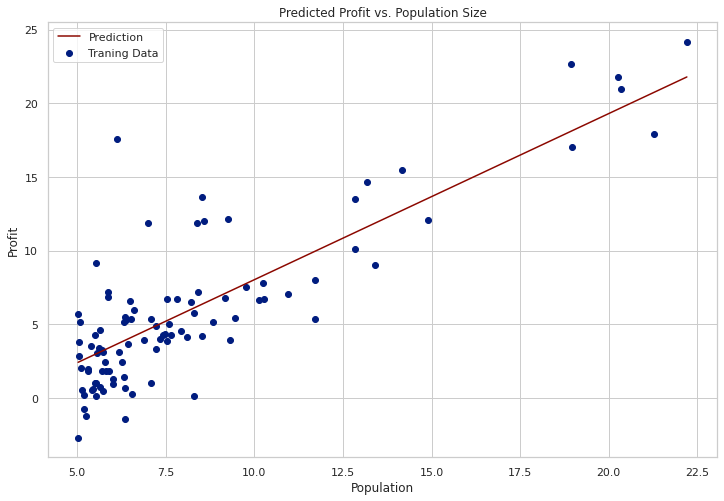

In [74]:
#绘制拟合曲线
x = np.linspace(data.population.min(), data.population.max(), 100)#在最大值和最小值之间生成100个点
f = w[0, 0] + (w[0, 1] * x)#拟合的函数

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

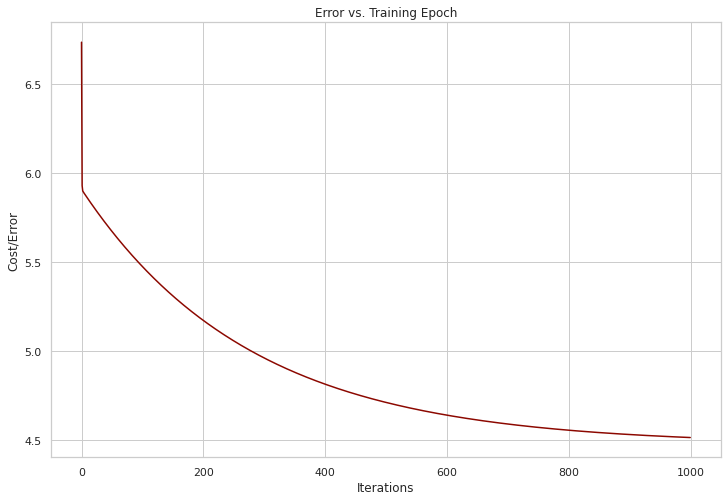

In [75]:
# 绘制代价函数的曲线
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1000), all_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost/Error')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [76]:
#数据2在数据1的基础上增加了一个特征。2个变量（房子的大小，卧室的数量）和目标（房子的价格）
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
# data2.head()
print(data2)

    Size  Bedrooms   Price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900
5   1985         4  299900
6   1534         3  314900
7   1427         3  198999
8   1380         3  212000
9   1494         3  242500
10  1940         4  239999
11  2000         3  347000
12  1890         3  329999
13  4478         5  699900
14  1268         3  259900
15  2300         4  449900
16  1320         2  299900
17  1236         3  199900
18  2609         4  499998
19  3031         4  599000
20  1767         3  252900
21  1888         2  255000
22  1604         3  242900
23  1962         4  259900
24  3890         3  573900
25  1100         3  249900
26  1458         3  464500
27  2526         3  469000
28  2200         3  475000
29  2637         3  299900
30  1839         2  349900
31  1000         1  169900
32  2040         4  314900
33  3137         3  579900
34  1811         4  285900
35  1437         3  249900
3

# 特征归一化
由于房子的大小和卧室的数量的数量级相差太大，所以我们需要对数据进行特征缩放

In [77]:
data2 = (data2 - data2.mean()) / data2.std()
# data2.head()
print(data2)

        Size  Bedrooms     Price
0   0.130010 -0.223675  0.475747
1  -0.504190 -0.223675 -0.084074
2   0.502476 -0.223675  0.228626
3  -0.735723 -1.537767 -0.867025
4   1.257476  1.090417  1.595389
5  -0.019732  1.090417 -0.323998
6  -0.587240 -0.223675 -0.204036
7  -0.721881 -0.223675 -1.130948
8  -0.781023 -0.223675 -1.026973
9  -0.637573 -0.223675 -0.783051
10 -0.076357  1.090417 -0.803053
11 -0.000857 -0.223675  0.052682
12 -0.139273 -0.223675 -0.083283
13  3.117292  2.404508  2.874981
14 -0.921956 -0.223675 -0.643896
15  0.376643  1.090417  0.875619
16 -0.856523 -1.537767 -0.323998
17 -0.962223 -0.223675 -1.123743
18  0.765468  1.090417  1.276275
19  1.296484  1.090417  2.068039
20 -0.294048 -0.223675 -0.699878
21 -0.141790 -1.537767 -0.683083
22 -0.499157 -0.223675 -0.779852
23 -0.048673  1.090417 -0.643896
24  2.377392 -0.223675  1.867303
25 -1.133356 -0.223675 -0.723870
26 -0.682873 -0.223675  0.992382
27  0.661026 -0.223675  1.028370
28  0.250810 -0.223675  1.076355
29  0.8007

In [78]:
#下面的步骤跟之前差不多
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]


# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0])) #注意此处权重为3个参数，b，w1，w2

# perform linear regression on the dataset2
w2, all_cost2 = gradientDescent(X2, y2, theta2)
print("fincal theta:", w2, "final cost:", computeCost(X2, y2, w2))

fincal theta: [[-1.10839234e-16  8.78503652e-01 -4.69166570e-02]] final cost: 0.1307033696077189
